In [1]:
import sys
sys.path.insert(0, 'D:/Github/EnsemblePursuit')
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import sys
sys.path.append("..")
#Notice you need the PCA in utils, because it relies on SVD and we need the singular values for the image approximation
from EnsemblePursuit.utils import test_train_split,subtract_spont, PCA
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ridge_regression
from scipy.stats import zscore

In [2]:
#Load in data
data_path='H:/DATA/downloads/natimg2800_M170717_MP034_2017-09-11.mat' 

#data_path='/home/maria/Documents/EnsemblePursuit_old/experiments/natimg2800_M170717_MP034_2017-09-11.mat'
data = io.loadmat(data_path)
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp)

In [3]:
#Fit model
ep=EnsemblePursuit(n_components=150,lam=0.01,n_kmeans=25)
model=ep.fit(X)

obtained 25 PCs in 1.4950 seconds
initialized 25 clusters with k-means in 9.9973 seconds
ensemble 0, time 2.20, nr neurons 1429, EV 0.0058
ensemble 25, time 28.42, nr neurons 219, EV 0.0473
ensemble 50, time 41.16, nr neurons 147, EV 0.0636
ensemble 75, time 50.91, nr neurons 106, EV 0.0751
ensemble 100, time 59.09, nr neurons 65, EV 0.0847
ensemble 125, time 65.34, nr neurons 42, EV 0.0919
ensemble 149, time 70.52, nr neurons 34, EV 0.0985
average sparsity is 0.0184


torch.Size([2800, 18360])
torch.Size([2800, 2800])
alpha 0.01


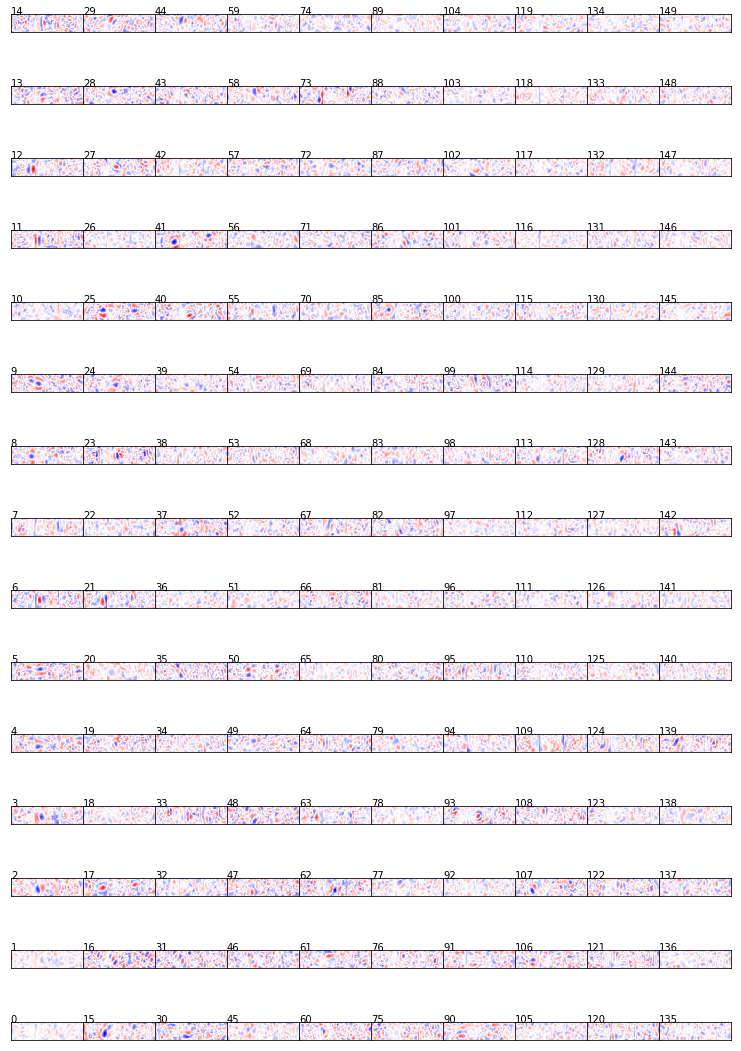

array([[-1.30553799e-08, -2.83176629e-08, -4.31643947e-08, ...,
         1.03136841e-08,  4.49875071e-09, -3.29115712e-09],
       [ 1.67011702e-08,  2.75921685e-08,  3.39511210e-08, ...,
        -7.38946948e-09, -1.90756050e-10,  7.99672240e-09],
       [-4.97131083e-08, -7.10286230e-08, -7.57439338e-08, ...,
         6.34147241e-08,  2.15666436e-08, -1.51260888e-08],
       ...,
       [ 6.31278230e-09,  7.71758746e-09,  1.06090035e-08, ...,
         1.66014154e-08,  9.76445591e-09,  4.49609061e-09],
       [-6.64728328e-10, -7.02825753e-09, -1.81633535e-08, ...,
        -3.24537019e-08, -6.53947074e-09,  2.10732154e-10],
       [ 4.05859701e-09,  8.80109585e-09,  1.93986160e-08, ...,
        -4.41071748e-08, -2.59018744e-08, -5.65639713e-09]], dtype=float32)

In [5]:
from scipy.stats import zscore
def plot_all_receptive_fields(assembly_array):
    nr_of_components=150
    first_dim=10
    second_dim=nr_of_components//10
    assembly_array=zscore(assembly_array,axis=0)
    assembly_array=assembly_array.reshape(first_dim,second_dim,18360)
    fig=plt.figure(figsize=(first_dim,second_dim))
    ax=[]
    i=0
    for ind1 in range(0,first_dim):
        for ind2 in range(0,second_dim):
            #vmin=np.min(assembly_array[ind1,ind2,:])
            vmax=np.max(assembly_array)
            ax=fig.add_axes([ind1/first_dim,ind2/second_dim,1./first_dim,1./second_dim])
            ax.imshow(assembly_array[ind1,ind2,:].reshape(68,270),cmap='bwr',vmin=-vmax,vmax=vmax)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(x=ind1/first_dim,y=ind2/second_dim,s=str(i))
            i+=1
    plt.show()
    
im_path='H:/DATA/downloads/images_natimg2800_all.mat'
stim_path='H:/DATA/downloads/natimg2800_M170717_MP034_2017-09-11.mat' 

def fit_ridge_with_plot(V,im_path,stim_path):
    images=io.loadmat(im_path)['imgs']
    images=images.transpose((2,0,1))
    images=images.reshape((2800,68*270))
    #Need the PCA in old utils
    reduced_images=PCA(images)
    stim=io.loadmat(stim_path)['stim']['istim'][0][0].astype(np.int32)
    x_train,x_test,y_train,y_test=test_train_split(V,stim)
    y_train=y_train-1
    reduced_images_=reduced_images[y_train]
    #for alpha in [0.01,0.1,1,10,100,1000,5000]:
    for alpha in [0.01]:
        assembly_array=[]
        nr_of_components=V.shape[1]
        for assembly in range(0,nr_of_components):
            av_resp=(x_train[:,assembly].T+x_test[:,assembly].T)/2
            reg=ridge_regression(reduced_images_,av_resp,alpha=alpha,solver='lsqr')
            assembly_array.append(reg)
        assembly_array=np.array(assembly_array)
        print('alpha',alpha)
        plot_all_receptive_fields(assembly_array)
    return assembly_array

fit_ridge_with_plot(model.components_,im_path,stim_path)

In [6]:
images=io.loadmat(im_path)['imgs']
images=images.transpose((2,0,1))
images=images.reshape((2800,68*270))
#Need the PCA in old utils
reduced_images=PCA(images)

torch.Size([2800, 18360])
torch.Size([2800, 2800])


In [ ]:
plt.imshow(reduced_images[500, :].reshape(68, -1))
plt.colorbar()